Exercise 2.5 (programming) Design and conduct an experiment to demonstrate the
diculties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take
independent random walks (say by adding a normally distributed increment with mean $0$
and standard deviation $0.01$ to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2
for an action-value method using sample averages, incrementally computed, and another
action-value method using a constant step-size parameter, $\alpha = 0.1$. Use $\epsilon = 0.1$ and
longer runs, say of $10,000$ steps.

First I'll write the code for the plot on page 29, figure 2.2 with stationary $q_*(a)$ and check if my plot match with theirs by doing each run for 1000 steps.

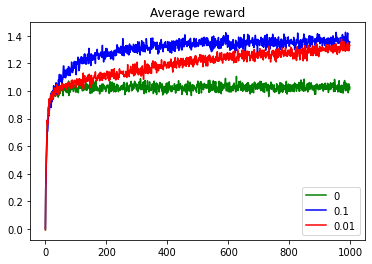

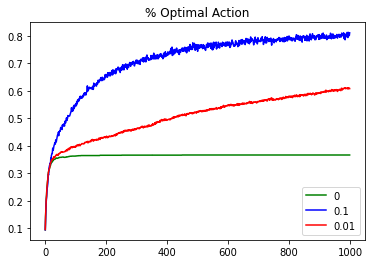

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
def experiment(epsilon, N_STEPS, runs):
    rewards_list = np.zeros(N_STEPS)
    optimal_actions_list = np.zeros(N_STEPS)
    for i in range(runs):
      np.random.seed(i)
      mu = 0; sigma = 1
      realQs = np.random.normal(mu, sigma, 10)
      optimal_action = np.argmax(realQs)
      Qa = np.zeros(10)
      Na = np.zeros(10)
      for step in range(N_STEPS):
          action = 0
          reward = 0
          prob = random.uniform(0.0, 1.0)
          if prob < (1.0 - epsilon):
              action = np.argmax(Qa)
              if action == optimal_action:
                  optimal_actions_list[step] += 1
              reward = np.random.normal(realQs[action], 1, 1)[0]
              rewards_list[step] += reward
              Na[action] += 1
              Qa[action] += (1/Na[action])*(reward-Qa[action])
          else:
              action = np.random.randint(0, 10, 1)[0]
              if action == optimal_action:
                  optimal_actions_list[step] += 1
              reward = np.random.normal(realQs[action], 1, 1)[0]
              rewards_list[step] += reward
              Na[action] += 1
              Qa[action] += (1/Na[action])*(reward-Qa[action])
        
    return rewards_list/runs, optimal_actions_list/runs

N_STEPS = 1000
eps0, opt0 = experiment(0, N_STEPS, 2000)
eps01, opt01 = experiment(0.1, N_STEPS, 2000)
eps001, opt001 = experiment(0.01, N_STEPS, 2000)

def plot1(eps0,eps01,eps001, N_STEPS):
    step_axis = np.arange(N_STEPS)
    plt.plot(step_axis, eps0 , c= 'g', label = '0')
    plt.plot(step_axis, eps01 , c= 'b', label = '0.1')
    plt.plot(step_axis, eps001, c = 'r', label = '0.01')
    plt.legend(loc = "lower right")
    plt.title(label = "Average reward")
    plt.show()

def plot2(opt0, opt01, opt001, N_STEPS):
    step_axis = np.arange(N_STEPS)
    plt.plot(step_axis, opt0 , c= 'g', label = '0')
    plt.plot(step_axis, opt01 , c= 'b', label = '0.1')
    plt.plot(step_axis, opt001, c = 'r', label = '0.01')
    plt.legend(loc = "lower right")
    plt.title(label = "% Optimal Action")
    plt.show()
  
plot1(eps0,eps01,eps001, N_STEPS)
plot2(opt0, opt01, opt001, N_STEPS)

Now let's run the stationary case for 10000 steps per run.

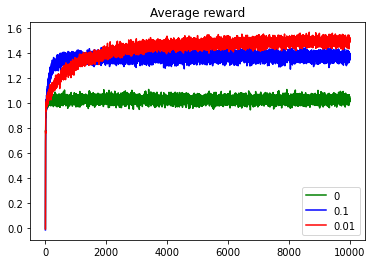

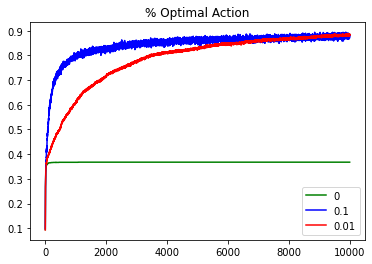

In [4]:
N_STEPS = 10000
eps0, opt0 = experiment(0, N_STEPS, 2000)
eps01, opt01 = experiment(0.1, N_STEPS, 2000)
eps001, opt001 = experiment(0.01, N_STEPS, 2000)
plot1(eps0,eps01,eps001, N_STEPS)
plot2(opt0, opt01, opt001, N_STEPS)

Now I'll write the code for the non-stationary case. 

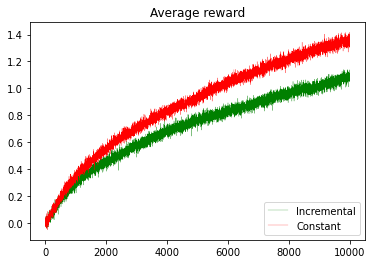

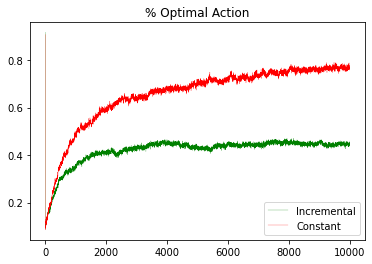

In [5]:

def experiment(epsilon, N_STEPS, runs, actionValueMethod, alpha = 0.1):
    rewards_list = np.zeros(N_STEPS)
    optimal_actions_list = np.zeros(N_STEPS)
    for i in range(runs):
      np.random.seed(i)
      mu = 0; sigma = 1
      # Now our realQs are all equal (arbitrarily picked 0)
      realQs = np.zeros(10)
      Qa, Na = np.zeros(10), np.zeros(10)
      for step in range(N_STEPS):
          action = 0
          reward = 0
          optimal_action = np.argmax(realQs)
          prob = random.uniform(0.0, 1.0)
          if prob < (1.0 - epsilon):
              action = np.argmax(Qa)
              if action == optimal_action:
                  optimal_actions_list[step] += 1
              reward = np.random.normal(realQs[action], 1, 1)[0]
              rewards_list[step] += reward
              if actionValueMethod == "Incremental":
                  Na[action] += 1
                  Qa[action] += (1/Na[action])*(reward-Qa[action])
              elif actionValueMethod == "Constant":
                  Qa[action] += alpha*(reward-Qa[action])
          else:
              action = np.random.randint(0, 10, 1)[0]
              if action == optimal_action:
                  optimal_actions_list[step] += 1
              reward = np.random.normal(realQs[action], 1, 1)[0]
              rewards_list[step] += reward
              if actionValueMethod == "Incremental":
                  Na[action] += 1
                  Qa[action] += (1/Na[action])*(reward-Qa[action])
              elif actionValueMethod == "Constant":
                  Qa[action] += alpha*(reward-Qa[action])
          # adding a normally distributed increment with mean  0  and standard deviation  0.01  to all the  q∗(a)  on each step
          realQs += np.random.normal(0, 0.01, 10)
    return rewards_list/runs, optimal_actions_list/runs

N_STEPS = 10000
RUNS = 2000
epsI, optI = experiment(0.1, N_STEPS, RUNS, "Incremental", alpha = 0.1)
epsC, optC = experiment(0.1, N_STEPS, RUNS, "Constant", alpha = 0.1)

def plot1(epsI,epsC, N_STEPS):
    step_axis = np.arange(N_STEPS)
    plt.plot(step_axis, epsI , c= 'g', label = 'Incremental',linewidth=0.25)
    plt.plot(step_axis, epsC , c= 'r', label = 'Constant', linewidth=0.25)
    plt.legend(loc = "lower right")
    plt.title(label = "Average reward")
    plt.show()

def plot2(optI, optC, N_STEPS):
    step_axis = np.arange(N_STEPS)
    plt.plot(step_axis, optI , c= 'g', label = 'Incremental', linewidth=0.25)
    plt.plot(step_axis, optC , c= 'r', label = 'Constant', linewidth=0.25)
    plt.legend(loc = "lower right")
    plt.title(label = "% Optimal Action")
    plt.show()

plot1(epsI,epsC, N_STEPS)
plot2(optI, optC, N_STEPS)

It is evident that the sample average (Incremental) method is inferior to the constant method when the action values are non-stationary. The update of the value estimate for the sample average is $Q_{n+1}=Q_n+\frac{1}{n}(R_n-Q_n)=\frac{1}{n}R_n + \frac{1}{n}\sum^{n-1}_{i=1}R_i$ and the update for the value estimate for the constant strategy is $Q_{n+1}=\alpha R_n+(1-\alpha)Q_n$. 

For the sample average strategy, the most recent reward doesn't influence the new value estimate a lot and hence when the action values changes the agent doesn't have a very up-to-date value estimate, resulting in him choosing the action which gave good estimates before which influenced the action's estimate value but currently aren't optimal.

On the other hand the constant strategy updates the value estimates more rapidly and hence has better estimates of the actions, resulting in the agent choosing the optimal action more frequently.